
# Amazon Review Sentiment Analyzer 

## ***Abstract:*** 


>   Recently, text mining and computational linguistics research have grown extremely interested in the application challenge of sentiment analysis of product reviews. Sentiment analysis allows large-scale processing of data in an efficient and cost-effective manner. Here, we're interested in examining the relationship between customer ratings of products on Amazon and product reviews on Amazon.com as it influence the trends a lot.



> Businesses are being compelled to employ creative strategies to improve customer experiences
due to the fierce competition to acquire and retain customers online. Companies are
increasingly looking at consumer reviews on internet platforms like Amazon to better
understand how customers rank their products and services.



> A study on amazon last year revealed that online shoppers trust reviews as much as personal recommendations. Any online item with large amount of positive reviews provides a powerful comment of the legitimacy of the item. Conversely, books, or any other online item, without reviews puts potential prospects in a state of distrust. Quite simply, more reviews look more convincing. People value the consent and experience of others and the review on a material is the only way to understand others impression on the product. Opinions, collected from users' experiences regarding specific products or topics, straightforwardly influence future customer purchase decisions.



> The word "sentiment analysis" refers to as opinion mining, is a ***natural language processing (NLP)*** approach for detecting the emotional tone of a body of text; the process of determining if a text contains negative, positive, or neutral emotions. Natural
language processing (NLP) and machine learning are used in this type of text analytics.






> > Thus, such kind of analysis problems will require ***ML*** to come into action. ***Machine Learning algorithm like Naive Bayes' and Neural Networks can be used in solving such kind of problems.***


















## ***Importance:***

> > The goal of this NLP based project is to classify customer reviews of various items into various feedback classes, and to develop a supervised learning model to polarise a huge number of reviews along with choosing the optimal number of classes in which the data can be classified.




## ***1. Importing the required libraries such as pandas, numpy, re, sklearn, nltk etc.***

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import random

## ***2. Converting file into .csv:***



### > The dataset was unlabeled and to use it in a supervised learning model we had to label the data. ***We used JSON files for AMAZON_FASHION department where the structure of the data is as follows:***


---


“reviewerID”: ID of the reviewer

“asin”: ID of the product

“reviewerName”: name of the reviewer

“reviewText”: text of the review

“overall”: rating of the product

“summary”: summary of the review

“reviewTime”: time of the review (raw)

'unixReviewTime' : unix time of review 

'style': colour

'image': link for the image



---



> The initial file format of the dataset is .json. We need to convert it to .csv format to make it convenient to access and manipulate data.

***P.S : I already have converted it to csv and to save time and computation would be submitting the .csv.***



In [43]:

# import pandas as pd
#df = pd.read_json('AMAZON_FASHION.json', lines=True)
#df.to_csv('AMAZON_FASHION.csv')


## ***3. Manipulating/Cleaning the data:***


> The initial .csv file has a lot of noise or junk in it. We need to clean the data properly before using it in our model to ensure the proper reliability and accuracy of the model.

***3.1 :*** - Creating the data frame named 'df' and droping the irrelevant and redundant columns (i.e. 'Unnamed: 0', 'reviewTime' , 'reviewerID' , 'asin' ,  'reviewerName' , 'summary' , 'unixReviewTime' , 'vote' ,  'style' , 'image' ) which are not going to be a significant factor/feature for our model development and analysis.

In [44]:
# import pandas as pd

# load AMAZON_FASHION.csv into a pandas dataframe
df = pd.read_csv('AMAZON_FASHION.csv')

# print(df.shape)
# df.head()

#Dropping the unuseful columns.
df = df.drop(columns=['Unnamed: 0', 'reviewTime', 'reviewerID', 'asin', 'reviewerName','summary','unixReviewTime','vote','style','image'])
# show the first few rows
df.head()

#df.shape
#creating a sample for practicing the code:
#df1=df.head(50)
#df1.to_csv('AMAZON_FASHION_DEMO.csv')

,overall,verified,reviewText
0,5,True,Exactly what I needed.
1,2,True,"I agree with the other review, the opening is ..."
2,4,False,Love these... I am going to order another pack...
3,2,True,too tiny an opening
4,3,False,Okay


***3.2 Mapping:***

We already have the ratings class('overall') in numeric format. But for our understanding and readability, let us create a column 'label' by mapping the different numeric ratings with 5 different categorical classes which are as follows: 

> 1 : 'Very Negative', 2 : 'Negative', 3 : 'Neutral', 4 : 'Positive', 5 : 'Very Positive'

Moreover, we are also going to analyse the model having binary output class labels namely, 'Negative' and 'Positive'. So creating a column 'labelbin' with the following mapping to categorical values:

> 1 : 'Negative', 2 : 'Negative', 3 : 'Positive', 4 : 'Positive', 5 : 'Positive'

But Scikit-learn only deals with numerical values and hence if we were to leave our label values as strings, scikit-learn would do the conversion internally(more specifically, the string labels will be cast to unknown float values).

Thus, making a column 'labelbinoverall' by re-mapping the 'Negative' and 'Positive' with the numerical values 0 and 1 respectively:

> 'Negative' : 0 , 'Positive" : 1


*   If we left our labels as strings, our model would still be able to produce predictions, but we would run into problems later when calculating performance measures, such as when calculating our precision and recall scores. Therefore, it is best practise to feed our categorical variables into our model as integers in order to prevent unpleasant shocks in the future.

*   Also, to get an idea of the size of the dataset we are dealing with, print out number of rows and columns using 'shape'. And getting the glance of the data with 'head()'.



In [45]:
df['label'] = df.overall.map({0:'Very Negative',1:' Very Negative',2:'Negative',3:'Neutral',4:'Positive',5:'Very Positive'})
df['labelbin'] = df.overall.map({0:'Negative',1:'Negative',2:'Negative',3:'Positive',4:'Positive',5:'Positive'})
df['labelbinoverall'] = df.labelbin.map({'Negative':0,'Positive':1})

print(df.shape)
df.head()


(883636, 6)


,overall,verified,reviewText,label,labelbin,labelbinoverall
0,5,True,Exactly what I needed.,Very Positive,Positive,1
1,2,True,"I agree with the other review, the opening is ...",Negative,Negative,0
2,4,False,Love these... I am going to order another pack...,Positive,Positive,1
3,2,True,too tiny an opening,Negative,Negative,0
4,3,False,Okay,Neutral,Positive,1


***3.3 Dealing with missing OR null values:***

Now, we are going to remove the rows which are null as we would not be able to fill the null places with the mean as we only have columns with string data types which have null values. 

In [46]:
print(df.isnull().sum())

overall               0
verified              0
reviewText         1234
label                 0
labelbin              0
labelbinoverall       0
dtype: int64


In [47]:
print("Count before dropping:\n", df.count(), "\n")

# drop any row (axis 0) that has any type of null value
df = df.dropna(how='any', axis=0)

#dropping rows which are not verified
df=df.drop(df[df.verified == False].index,axis=0)
#df = df[(df.verified == False)]

print(df.isnull().sum(), "\n")

print("Count after dropping:\n", df.count())

Count before dropping:
 overall            883636
verified           883636
reviewText         882402
label              883636
labelbin           883636
labelbinoverall    883636
dtype: int64 

overall            0
verified           0
reviewText         0
label              0
labelbin           0
labelbinoverall    0
dtype: int64 

Count after dropping:
 overall            827526
verified           827526
reviewText         827526
label              827526
labelbin           827526
labelbinoverall    827526
dtype: int64


In [48]:
#A sample created just for practicing the code
# df1=df.head(50)
# df1.to_csv('AMAZON_FASHION_DEMO.csv')
# df1 = pd.read_csv('AMAZON_FASHION_DEMO.csv')
# df1.head()

In [49]:
df.describe
df.head()

,overall,verified,reviewText,label,labelbin,labelbinoverall
0,5,True,Exactly what I needed.,Very Positive,Positive,1
1,2,True,"I agree with the other review, the opening is ...",Negative,Negative,0
3,2,True,too tiny an opening,Negative,Negative,0
5,5,True,Exactly what I wanted.,Very Positive,Positive,1
6,4,True,These little plastic backs work great. No mor...,Positive,Positive,1


***3.4 Plotting a graph for verified ratings and their counts***

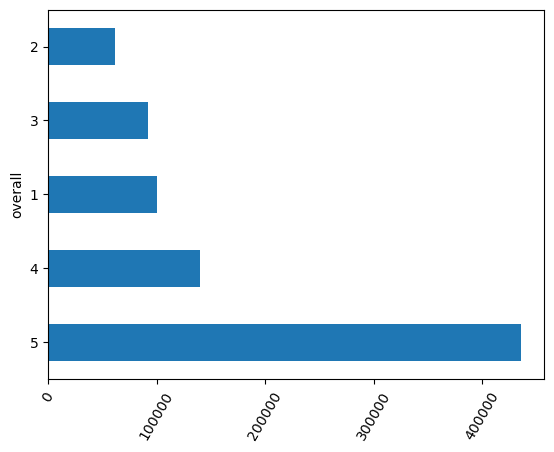

In [50]:

df['overall'].value_counts()[:].plot(kind='barh')
#plt.bar(df1['overall'],len(df1['overall']))

# set the y-axis label to "overall"
plt.ylabel('overall')

# rotate the x-ticks to 60 degrees to be visible
plt.xticks(rotation=60)

plt.show()

***The 5-star ratings are way more than any other ratings.***

## ***4. Bag of words:***

Bag of word is a process of extracting features by representing simplified text or data, used in natural language processing and information retrieval. In this model, a text or a document is represented as the bag (multiple set) of its words. So, simply bag of words in sentiment analysis is creating a list of useful words. We have used bag of words approach to extract our feature sets. After preprocessed dataset we used pos tagging to separate different parts of speech and from that we select nouns and adjectives and use those to create a bag of words. Then we run it through a supervised learning and find our results and also the top used words from the review dataset.

***What we have here in our data set is a large collection of text data (827,526 rows of data).***

***4.1***: Converting all the strings to their lower case. Saving them into a list called 'lowercase_doc'. This can be done by using the lower() method.

In [51]:
lowercase_doc = []
for i in df['reviewText']:
  lowercase_doc.append(i.lower())
#print(lowercase_doc)

***4.2 : Removing the punctuations***

Removing all punctuation from the lowercaase_doc list's string and saving them into a list called 'nopunct_doc'.

In [52]:
nopunct_doc = []

for i in lowercase_doc:
  nopunct_doc.append(i.translate(str.maketrans('','',string.punctuation)))
# print(nopunct_doc)

***4.3 : Removing Stop Words:***

Stop words are the common words which are always present in a sentence just to make it grammatically correct. Thet do not give any meaning to the sentences.

Moreover, our dataset is really very large. So it will be profitable to use the stop words removal as it will reduce the data size and would increase the execution speed.

Here given is a standard stop word list 'stop_list' with all the common stopwords in english language.

Removing the stopwords and the numerical values(if present in the review) and storing the remaining strings in data_ns list.

***Tokenization:***
It is the process of separating a sequence of strings into individuals such as words, keywords, phrases, symbols and other elements known as tokens. Tokens can be individual words, phrases or even whole sentences. In the process of tokenization, some characters like punctuation marks are discarded. The tokens work as the input for different process like parsing and text mining.

In [53]:
stop_list = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
             "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself",
             "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which",
             "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be",
             "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
             "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for",
             "with", "about", "against", "between", "into", "through", "during", "before", "after",
             "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
             "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all",
             "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not",
             "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don",
             "should", "now"]


In [54]:
data_ns=[]
# j=0
for i in nopunct_doc:
  
  Tkn = re.split('(\W)', i)
  Tkn_ns = [i for i in Tkn if i not in stop_list and i.isalpha()]
  data_ns.append(' '.join(Tkn_ns))#, df1['overall'][j]])
  # j+=1
  # print(df1['overall'](i+1))
#print(data_ns)

In [56]:
print(len(data_ns))

827526


In [57]:
# from sklearn.feature_extraction.text import CountVectorizer
# count_vector = CountVectorizer()

# count_vector.fit(data_ns)
# count_vector.get_feature_names()
# doc_array = count_vector.transform(data_ns).toarray()
# frequencies_matrix = pd.DataFrame(doc_array, columns=count_vector.get_feature_names())
#frequencies_matrix

## ***5. Training and testing sets:***

Spliting the dataset into a training and testing set by using the train_test_split method in sklearn. Spliting the data using the following variables:


1.   X_train is our training data obtained after preprocessing and forming the list 'data_ns'.

2.   y_train is our training data for the 'overall' column

3.   X_test is our testing data obtained after preprocessing and forming the list 'data_ns'

4.   y_test is our testing data for the 'overall' column 





In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_ns, df['overall'])

## ***A. For 5-Label output:***

***6.A. Applying Bag of Words processing to the dataset using CountVectorizer() from sklearn library:***






1.   we have to fit our training data (X_train) into CountVectorizer() and return the matrix.
2.   we have to transform our testing data (X_test) to return the matrix.


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(analyzer='word',stop_words='english',lowercase=True)

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)
print(training_data.shape)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

(620644, 98249)


***7.A. Naive Bayes implementation using scikit-learn:***

we will be using the multinomial Naive Bayes implementation. This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input.

In [60]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB(alpha=1.0)
naive_bayes.fit(training_data,y_train)

MultinomialNB()

In [61]:
predictions = naive_bayes.predict(testing_data)

so, now that predictions have been made on our test set, lets check the accuracy of our predictions.

***8.A. Model Evaluation:***

Predictions are made on the test set. Now, all we want to do is to evaluate how well our model is doing. There are various mechanisms for doing so:

***Accuracy*** : measures how often the classifier makes the correct prediction. Ratio of the number of correct predictions to the total number of predictions (the number of test data points).

***Precision*** : what proportion of messages we classified as a class, actually were the same. Ratio of true positives(words classified as a class, and which are actually that specific class) to all positives(all words classified as specific class, irrespective of whether that was the correct classification), in other words it is the ratio of


> [True Positives/(True Positives + False Positives)]


***Recall*** : tells us what proportion of messages that actually were a specific class were classified by us as the same. It is a ratio of true positives(words classified as a specific class, and which are actually the same) to all the words that were actually that specific class, in other words it is the ratio of



> [True Positives/(True Positives + False Negatives)]

***F1 score*** : The weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.

***The 'average=None' parameter of every score function gives the individual score value for every label out of all the 5 output classes in a multi variable classification***

In [62]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy Score : ",accuracy_score(y_test, predictions))
print('Precision Score',precision_score(y_test,predictions, average=None))
print('Recall Score',recall_score(y_test,predictions, average=None))
print('F1 Score',f1_score(y_test,predictions, average=None))

accuracy Score :  0.6453098867953713
Precision Score [0.61290674 0.34       0.36935012 0.4090444  0.73639385]
Recall Score [0.6767875  0.05127869 0.28805682 0.28597179 0.91141147]
F1 Score [0.64326506 0.08911681 0.32367721 0.33661132 0.81460812]


***Conclusion :*** From the scores it can be observed that the  scores are not uniform across the labels. Moreover, the are not even that significant. One of the reason for this might be the classification into 5 labels. As we increase the number of labels to classify into, every label get less amount of data to train upon.

Here, we can observe that for every score category, the extreme scores of 1 : 'Very Negative' and 5 : 'Very Positive' are way more higher than the remaining ones.

***So, now let us develop the model with only 2 labels to classify data into: 'Negative' and 'Positive'.***

## ***B. For Binary(2)-Label output***

***6.B. Applying Bag of Words processing to the dataset using CountVectorizer() from sklearn library:***






1.   we have to fit our training data (X_train_bin) into CountVectorizer() and return the matrix.
2.   we have to transform our testing data (X_test_bin) to return the matrix.


In [63]:
#with 2 labels

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(data_ns, df['labelbinoverall']) 

In [64]:
count_vector_bin = CountVectorizer(analyzer='word',stop_words='english',lowercase=True)

# Fit the training data and then return the matrix
training_data_bin = count_vector_bin.fit_transform(X_train_bin)
print(training_data_bin.shape)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data_bin = count_vector_bin.transform(X_test_bin)

(620644, 98453)


***7.B. Naive Bayes implementation using scikit-learn (for binary-Label):***

we will be using the multinomial Naive Bayes implementation. This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input.

In [65]:
naive_bayes_bin = MultinomialNB(alpha=1.0)
naive_bayes_bin.fit(training_data_bin,y_train_bin)

MultinomialNB()

In [66]:
predictions_bin = naive_bayes_bin.predict(testing_data_bin)

So, now that predictions have been made on our test set, lets check the accuracy of our predictions.

**8.B. Model Evaluation (for binary-Label):**

Predictions are made on the test set. Now, all we want to do is to evaluate how well our model is doing. There are various mechanisms for doing so:

**Accuracy** : measures how often the classifier makes the correct prediction. Ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** : what proportion of messages we classified as a True, actually were True. Ratio of true positives(words classified as True, and which are actually True) to all positives(all words classified as True, irrespective of whether that was the correct classification), in other words it is the ratio of



> [True Positives/(True Positives + False Positives)]

**Recall** : tells us what proportion of messages that actually were True were classified by us as True. It is a ratio of true positives(words classified as True, and which are actually True) to all the words that were actually True, in other words it is the ratio of



> [True Positives/(True Positives + False Negatives)]

**F1 score** : The weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.

In [67]:
print("Accuracy Score : ",accuracy_score(y_test_bin, predictions_bin))
print('Precision Score',precision_score(y_test_bin,predictions_bin, average=None))
print('Recall Score',recall_score(y_test_bin,predictions_bin, average=None))
print('F1 Score',f1_score(y_test_bin,predictions_bin, average=None))
print('Average Accuracy Score',accuracy_score(y_test_bin, predictions_bin))
print('Average Precision Score',precision_score(y_test_bin,predictions_bin))
print('Average Recall Score',recall_score(y_test_bin,predictions_bin))
print('Average F1 Score',f1_score(y_test_bin,predictions_bin))

Accuracy Score :  0.887312574317727
Precision Score [0.74565972 0.91572173]
Recall Score [0.63956519 0.94723541]
F1 Score [0.68854956 0.93121203]
Average Accuracy Score 0.887312574317727
Average Precision Score 0.9157217302491847
Average Recall Score 0.9472354117018531
Average F1 Score 0.9312120291167888


***Conclusion:*** Every score has increased significantly as soon as the number of labels are decreased. The average accuracy is around 89% and the average precision is around 92% for binary label analysis.

Here, we can observe that for every score category, the score of the 1:'Positive' label is much higher than the 0:'Negative'. This might be because 1:'Positive' review data were way more than other.

***So, now let us develop the model having 2 labels -using lemmatization- to classify data into: 'Negative' and 'Positive'.***

***Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. Thus lemmatization can further reduce the corpus size and enhance computation speed.***

*   Lemmatizing the nopunct_doc list and removing stop words to form data_ns_lem using nltk's WordNetLemmatizer()




In [68]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

data_ns_lem,Tkn_ns_lem=[],[]
#print(len(Tkn_ns_lem))
lemmatizer = WordNetLemmatizer()
  
#print("wanted :", lemmatizer.lemmatize("wanted",pos='a'))
#print("wanted :", lemmatizer.lemmatize("wanted",pos='n'))
#j=0
for i in nopunct_doc:
  
  Tkn_lem = re.split('(\W)', i)
  Tkn_ns_lem = [lemmatizer.lemmatize(i) for i in Tkn_lem if i not in stop_list and i.isalpha()]
  # if j<=9:
  #   print(Tkn_ns_lem)
  #   j+=1
  data_ns_lem.append(' '.join(Tkn_ns_lem))



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amanshah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/amanshah/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [69]:
print(len(data_ns_lem))
#mylist = ["a", "b", "a", "c", "c"]
#data_ns_lem = list(dict.fromkeys(data_ns_lem))
#print(len(data_ns_lem))

827526


## ***C. For Binary(2)-Label output  -WITH LEMMATIZATION-*** 

***6.C. Applying Bag of Words processing to the dataset using CountVectorizer() from sklearn library:***






1.   we have to fit our training data (X_train_bin_lem) into CountVectorizer() and return the matrix.
2.   we have to transform our testing data (X_test_bin_lem) to return the matrix.


In [70]:
from sklearn.model_selection import train_test_split

X_train_bin_lem, X_test_bin_lem, y_train_bin_lem, y_test_bin_lem = train_test_split(data_ns_lem, df['labelbinoverall'])

In [71]:
count_vector_bin_lem = CountVectorizer(analyzer='word',stop_words='english',lowercase=True)

# Fit the training data and then return the matrix
training_data_bin_lem = count_vector_bin_lem.fit_transform(X_train_bin_lem)
print(training_data_bin_lem.shape)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data_bin_lem = count_vector_bin_lem.transform(X_test_bin_lem)

(620644, 92806)


***7.C. Naive Bayes implementation using scikit-learn (for 2-Label -WITH LEMMATIZATION-):***

The capability of Naive Bayes to handle an exceptionally large number of features is one of its key benefits over other classification methods. Since there are thousands of different words, they are all treated as features in our situation. Additionally, it functions well even when irrelevant features are present and is largely unaffected by them. The other major advantage it has is its relative simplicity. Naive Bayes' works well right out of the box and tuning it's parameters is rarely ever necessary, except usually in cases where the distribution of the data is known. It rarely ever overfits the data. Another important advantage is that its model training and prediction times are very fast for the amount of data it can handle.

we will be using the multinomial Naive Bayes implementation. This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input.

In [72]:
naive_bayes_bin_lem = MultinomialNB(alpha=1.0)
naive_bayes_bin_lem.fit(training_data_bin_lem,y_train_bin_lem)

MultinomialNB()

In [73]:
predictions_bin_lem = naive_bayes_bin_lem.predict(testing_data_bin_lem)

So, now that predictions ***after lemmatization*** have been made on our test set, lets check the accuracy of our predictions.

***8.C. Model Evaluation (for 2-Label -WITH LEMMATIZATION-):***

Predictions are made on the test set. Now, all we want to do is to evaluate how well our model is doing. There are various mechanisms for doing so:

***Accuracy*** : measures how often the classifier makes the correct prediction. Ratio of the number of correct predictions to the total number of predictions (the number of test data points).

***Precision*** : what proportion of messages we classified as a True, actually were True. Ratio of true positives(words classified as True, and which are actually True) to all positives(all words classified as True, irrespective of whether that was the correct classification), in other words it is the ratio of

[True Positives/(True Positives + False Positives)]

***Recall*** : tells us what proportion of messages that actually were True were classified by us as True. It is a ratio of true positives(words classified as True, and which are actually True) to all the words that were actually True, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

***F1 score*** : The weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.

In [74]:
print('Accuracy Score',accuracy_score(y_test_bin_lem, predictions_bin_lem))
print('Precision Score',precision_score(y_test_bin_lem,predictions_bin_lem,average=None))
print('Recall Score',recall_score(y_test_bin_lem,predictions_bin_lem,average=None))
print('F1 Score',f1_score(y_test_bin_lem,predictions_bin_lem,average=None))
print('\n')
print('average Accuracy Score',accuracy_score(y_test_bin_lem, predictions_bin_lem))
print('average Precision Score',precision_score(y_test_bin_lem,predictions_bin_lem))
print('average Recall Score',recall_score(y_test_bin_lem,predictions_bin_lem))
print('average F1 Score',f1_score(y_test_bin_lem,predictions_bin_lem))

Accuracy Score 0.8862588335379589
Precision Score [0.74702459 0.91383154]
Recall Score [0.63192005 0.94802831]
F1 Score [0.68466827 0.93061588]


average Accuracy Score 0.8862588335379589
average Precision Score 0.9138315429828879
average Recall Score 0.9480283077810352
average F1 Score 0.9306158795309325


***Conclusion:*** Every score has increased a bit except Precision score when the data is lemmatized. Lemmatization has shown a positive impact on the model. 

Here, we can observe that for every score category, the score of the 1 : 'Positive' label is much higher than the 0 : 'Negative'. This might be because 1 : 'Positive' review data were way more than other.

***Thus, the binary(2)-Label model with lemmatization is more efficient compared to others.***

### ***References:*** 
Stackoverflow, Tutorials, geeksforgeeks.org
